201812 2018 evaluation vs GRL dataset

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


In [9]:
##changeable variables
scrdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/pyscripts/MODEL_EVAL_scripts/'
DIC = nc.Dataset(scrdir+'/DIC_BR2015_modeloutput_for_GRL_comparison.nc')
TA = nc.Dataset(scrdir+'/TA_BR2015_modeloutput_for_GRL_comparison.nc')
NO3 = nc.Dataset(scrdir+'/NO3_BR2015_modeloutput_for_GRL_comparison.nc')
sal = nc.Dataset(scrdir+'/sal_BR2015_modeloutput_for_GRL_comparison.nc')

## PSU to reference salinity
SR = (35.16504/35) g kg–1 * S

In [10]:
infil = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_nu.txt')

In [11]:
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]



 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [12]:
len(no3)

860

In [13]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35

In [14]:
S_psu= S_rs*35/35.16504

In [15]:
DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

TA_mod = TA['model_output']['mod_point'][:]
is_ref2 = TA['model_output']['mod_x'][:]
js_ref2 = TA['model_output']['mod_y'][:]

NO3_mod = NO3['model_output']['mod_point'][:]
is_ref3 = NO3['model_output']['mod_x'][:]
js_ref3 = NO3['model_output']['mod_y'][:]

sal_mod = sal['model_output']['mod_point'][:]
is_ref4 = sal['model_output']['mod_x'][:]
js_ref4 = sal['model_output']['mod_y'][:]

## Correlation plot, model DIC 

In [16]:
loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


  
    #4 is haro/puget

In [17]:
DIC_mod[DIC_mod==0]=np.nan

#DIC
dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

#salinity
sal_jdf=S_rs[~(np.isnan(DIC_mod))&(loc_tag==1)]
sal_haro=S_rs[~(np.isnan(DIC_mod))&(loc_tag==4)]
sal_ns =S_rs[~(np.isnan(DIC_mod))&(loc_tag==2)]
sal_cs=S_rs[~(np.isnan(DIC_mod))&(loc_tag==3)]

sal_compbl = S_rs[~(np.isnan(DIC_mod))]
sal_mod_compbl = sal_mod[~(np.isnan(DIC_mod))]

sal_MODjdf=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
sal_MODharo=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
sal_MODns =sal_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
sal_MODcs=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]


#ta
ta_jdf=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
ta_haro=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
ta_ns =alk_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
ta_cs=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

ta_MODjdf=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
ta_MODharo=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
ta_MODns =TA_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
ta_MODcs=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

alk_compbl = alk_conv[~(np.isnan(DIC_mod))]
TA_mod_compbl = TA_mod[~(np.isnan(DIC_mod))]


#no3
NO3jdf=no3[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3haro=no3[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3ns =no3[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3cs=no3[~(np.isnan(DIC_mod))&(loc_tag==3)]

NO3_modjdf=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3_modharo=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3_modns =NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3_modcs=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]







## DIC evaluation

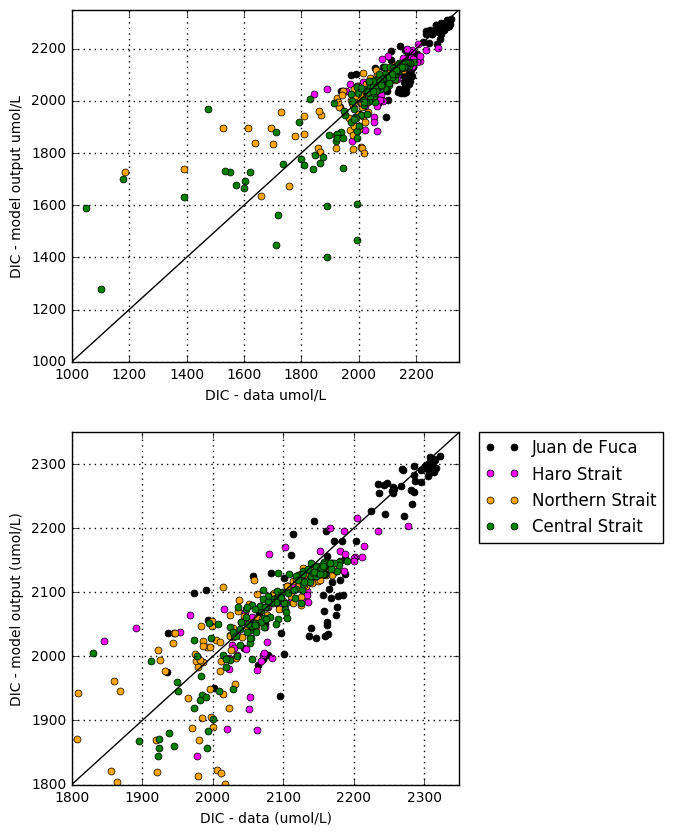

In [18]:
fig = plt.figure(figsize=(5,10))

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(2,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5)
        ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('DIC - data umol/L')
        ax.set_ylabel('DIC - model output umol/L')
        ax.set_xlim(1000,2350)
        ax.set_ylim(1000,2350)
        ax.plot([1000,2350],[1000,2350],'k')
    
    if i == 2:
        ax = fig.add_subplot(2,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=5, label = 'Juan de Fuca')
        ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5, label = 'Haro Strait')
        ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=5, label = 'Northern Strait')
        ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=5, label = 'Central Strait')
        #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('DIC - data (umol/L)')
        ax.set_ylabel('DIC - model output (umol/L)')
        #ax.legend( ['Juan de Fuca','Haro Strait','Northern Strait','Central Strait'],loc='best', fontsize = 20)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.set_xlim(1800,2350)
        ax.set_ylim(1800,2350)
        ax.plot([1800,2400],[1800,2400],'k')

In [19]:
# fig = plt.figure(figsize=(10,10))

# for i in range(1,2):
#     if i == 1:
#         ax = fig.add_subplot(1,1,i)
#         ax.grid(color='k', linestyle=':', linewidth=1)
#         ax.plot(ta_jdf,ta_MODjdf,'ko',markersize=10)
#         ax.plot(ta_haro,ta_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=10)
#         ax.plot(ta_ns,ta_MODns,c='orange', marker='o',linestyle='None',markersize=10)
#         ax.plot(ta_cs,ta_MODcs,c='green', marker='o',linestyle='None',markersize=10)
#         #ax.plot(ta_compbl,ta_mod_compbl,'r*',markersize=5)

#         ax.set_ylabel('Total Alkalinity - model output (mmol m$^{-3}$)', fontsize = 18)
#         ax.set_xlabel('Total Alkalinity - observations (mmol m$^{-3}$)', fontsize = 18)
#         ax.legend(['Juan de Fuca','Haro Strait','Northern Strait','Central Strait'],fontsize = 15,loc='best')
#         ax.set_xlim(1800,2400)
#         ax.set_ylim(1800,2400)
#         ax.tick_params(axis='both', which='major', labelsize=15)
#         #ax.tick_params(axis='both', which='minor', labelsize=8)
#         ax.plot([1800,2400],[1800,2400],'k')
    
# #     if i == 1:
# #         ax = fig.add_subplot(1,2,i)
# #         ax.grid(color='k', linestyle=':', linewidth=1)
# #         ax.plot(dic_jdf,dic_MODjdf,'ko',markersize=10)
# #         ax.plot(dic_haro,dic_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=10)
# #         ax.plot(dic_ns,dic_MODns,c='orange', marker='o',linestyle='None',markersize=10)
# #         ax.plot(dic_cs,dic_MODcs,c='green', marker='o',linestyle='None',markersize=10)
# #         #ax.plot(dic_compbl,DIC_mod_compbl,'r*',markersize=5)

# #         ax.set_xlabel('DIC - data (mmol $m^{-3}$)', fontsize = 20)
# #         ax.set_ylabel('DIC - model (mmol $m^{-3}$)', fontsize = 20)
# #         #ax.legend(['JdF','Haro','NS','CS'],loc='best')
# #         ax.set_xlim(1800,2400)
# #         ax.set_ylim(1800,2400)
# #         ax.plot([1800,2400],[1800,2400],'k')

# plt.savefig('modeval.jpg')

## DIC WILMOTT STATS

In [20]:
# dic_obs_compbl = dic_conv[~(np.isnan(DIC_mod))]
# dic_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

# obs =dic_obs_compbl
# mod = dic_mod_compbl
# print('metrics calculated on full dataset')
# print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
# print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                               len(obs))))
# xbar = np.mean(obs)
# print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                              np.sum((np.abs(mod - xbar) 
#                                      + np.abs(obs - xbar))**2))))
obs =dic_compbl
mod = DIC_mod_compbl
print()
print('metrics calculated on FULL DATASET')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))


obs =dic_jdf
mod = dic_MODjdf
print()
print('metrics calculated on JdF data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_haro
mod = dic_MODharo
print()
print('metrics calculated on Haro data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_cs
mod = dic_MODcs
print()
print('metrics calculated on CS data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_ns
mod = dic_MODns
print()
print('metrics calculated on NS data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))



metrics calculated on FULL DATASET
bias =  -7.941430016773211
RMSE = 91.32960211615475
Willmott = 0.9080898747900045

metrics calculated on JdF data
bias =  -20.133242340324614
RMSE = 57.35160412182577
Willmott = 0.920672010568779

metrics calculated on Haro data
bias =  -19.651233643425712
RMSE = 65.40841535907916
Willmott = 0.8192161023243805

metrics calculated on CS data
bias =  -9.561622470491784
RMSE = 109.87486819083954
Willmott = 0.8936027097920125

metrics calculated on NS data
bias =  7.794750886268957
RMSE = 93.27249238993969
Willmott = 0.8660184046455197


In [21]:
# dic_obs_compbl = dic_conv[~(np.isnan(DIC_mod))]
# dic_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

# obs =dic_obs_compbl
# mod = dic_mod_compbl
# print('metrics calculated on full dataset')
# print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
# print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                               len(obs))))
# xbar = np.mean(obs)
# print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                              np.sum((np.abs(mod - xbar) 
#                                      + np.abs(obs - xbar))**2))))

obs =dic_jdf[dic_jdf>1800]
mod = dic_MODjdf[dic_jdf>1800]
print()
print('metrics calculated on JdF data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_haro[dic_haro>1800]
mod = dic_MODharo[dic_haro>1800]
print()
print('metrics calculated on Haro data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_cs[dic_cs>1800]
mod = dic_MODcs[dic_cs>1800]
print()
print('metrics calculated on CS data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =dic_ns[dic_ns>1800]
mod = dic_MODns[dic_ns>1800]
print()
print('metrics calculated on NS data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))



metrics calculated on JdF data (>1800)
bias =  -20.133242340324614
RMSE = 57.35160412182577
Willmott = 0.920672010568779

metrics calculated on Haro data (>1800)
bias =  -19.651233643425712
RMSE = 65.40841535907916
Willmott = 0.8192161023243805

metrics calculated on CS data (>1800)
bias =  -26.627249216993278
RMSE = 79.39206292625518
Willmott = 0.8425783136517865

metrics calculated on NS data (>1800)
bias =  -10.011448725562786
RMSE = 54.848288110781645
Willmott = 0.8939579404832086


## TA evaluation

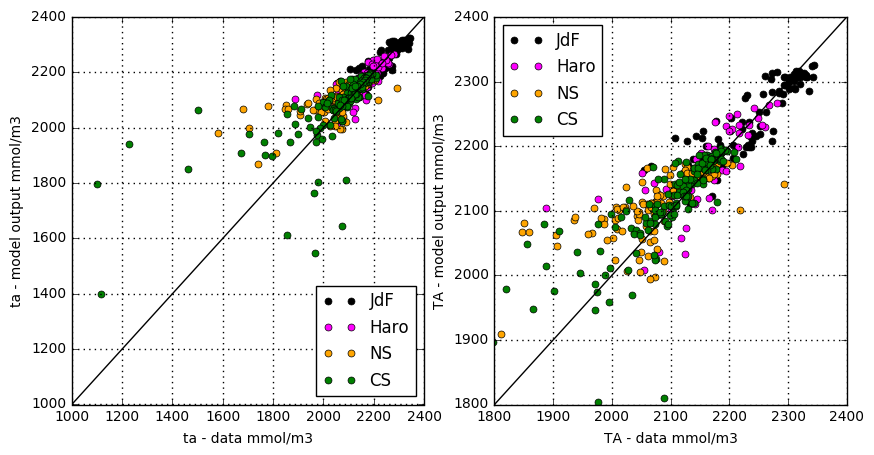

In [22]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(ta_jdf,ta_MODjdf,'ko',markersize=5)
        ax.plot(ta_haro,ta_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(ta_ns,ta_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(ta_cs,ta_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(ta_compbl,ta_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('ta - data mmol/m3')
        ax.set_ylabel('ta - model output mmol/m3')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(1000,2400)
        ax.set_ylim(1000,2400)
        ax.plot([1000,2400],[1000,2400],'k')
    
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(ta_jdf,ta_MODjdf,'ko',markersize=5)
        ax.plot(ta_haro,ta_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(ta_ns,ta_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(ta_cs,ta_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(ta_compbl,ta_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('TA - data mmol/m3')
        ax.set_ylabel('TA - model output mmol/m3')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(1800,2400)
        ax.set_ylim(1800,2400)
        ax.plot([1800,2400],[1800,2400],'k')

In [23]:
obs =alk_compbl[~isnan(alk_compbl)]
mod = TA_mod_compbl[~isnan(alk_compbl)]

print()
print('metrics calculated on FULL DATASET')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_haro
mod = ta_MODharo
print('metrics calculated on haro data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_jdf
mod = ta_MODjdf
print('metrics calculated on jdf data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_cs[~np.isnan(ta_cs)]
mod = ta_MODcs[~np.isnan(ta_cs)]
print('metrics calculated on cs data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_ns[~np.isnan(ta_ns)]
mod = ta_MODns[~np.isnan(ta_ns)]
print('metrics calculated on ns data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))


metrics calculated on FULL DATASET
bias =  24.789328959731847
RMSE = 91.78920645552569
Willmott = 0.8508141389853379

metrics calculated on haro data
bias =  10.381797307227316
RMSE = 49.49372574700717
Willmott = 0.8266878152788887

metrics calculated on jdf data
bias =  2.2699129127627202
RMSE = 34.863468562647405
Willmott = 0.9199779660589817

metrics calculated on cs data
bias =  27.236590537313077
RMSE = 120.96202005766301
Willmott = 0.7954913801990642

metrics calculated on ns data
bias =  43.43716198694028
RMSE = 88.88881648403989
Willmott = 0.6925464179359146


In [24]:
obs =ta_haro[(ta_haro>1800)]
mod = ta_MODharo[(ta_haro>1800)]
print('metrics calculated on haro data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_jdf[(ta_jdf>1800)]
mod = ta_MODjdf[(ta_jdf>1800)]
print('metrics calculated on jdf data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_cs[~np.isnan(ta_cs)&(ta_cs>1800)]
mod = ta_MODcs[~np.isnan(ta_cs)&(ta_cs>1800)]
print('metrics calculated on cs data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

print('')
obs =ta_ns[~np.isnan(ta_ns)&(ta_ns>1800)]
mod = ta_MODns[~np.isnan(ta_ns)&(ta_ns>1800)]
print('metrics calculated on ns data (>1800)')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

metrics calculated on haro data (>1800)
bias =  10.381797307227316
RMSE = 49.49372574700717
Willmott = 0.8266878152788887

metrics calculated on jdf data (>1800)
bias =  2.2699129127627202
RMSE = 34.863468562647405
Willmott = 0.9199779660589817

metrics calculated on cs data (>1800)
bias =  7.517022596153311
RMSE = 71.77415806706178
Willmott = 0.8125919288461244

metrics calculated on ns data (>1800)
bias =  33.47961592775755
RMSE = 65.81203688840449
Willmott = 0.7261744759213394


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


## salinity comparison

In [25]:
# dic_obs_compbl = dic_conv[~(np.isnan(DIC_mod))]
# dic_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]

# obs =dic_obs_compbl
# mod = dic_mod_compbl
# print('metrics calculated on full dataset')
# print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
# print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
#                               len(obs))))
# xbar = np.mean(obs)
# print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
#                              np.sum((np.abs(mod - xbar) 
#                                      + np.abs(obs - xbar))**2))))
obs =sal_compbl
mod = sal_mod_compbl
print()
print('metrics calculated on FULL DATASET')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))


obs =sal_jdf
mod = sal_MODjdf
print()
print('metrics calculated on JdF data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =sal_haro
mod = sal_MODharo
print()
print('metrics calculated on Haro data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs = sal_cs
mod = sal_MODcs
print()
print('metrics calculated on CS data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))

obs =sal_ns
mod = sal_MODns
print()
print('metrics calculated on NS data')
print('bias =  ' + str(-np.mean(obs) + np.mean(mod)))
print('RMSE = ' + str(np.sqrt(np.sum((mod - obs)**2) /
                              len(obs))))
xbar = np.mean(obs)
print('Willmott = ' + str(1-(np.sum((mod - obs)**2)  / 
                             np.sum((np.abs(mod - xbar) 
                                     + np.abs(obs - xbar))**2))))



metrics calculated on FULL DATASET
bias =  0.2904318304678064
RMSE = 1.7915350464352855
Willmott = 0.8644396824293064

metrics calculated on JdF data
bias =  -0.1629369601806303
RMSE = 0.6743007014000556
Willmott = 0.9315779384030243

metrics calculated on Haro data
bias =  0.005971038996467115
RMSE = 0.9663587983972575
Willmott = 0.8310976946975597

metrics calculated on CS data
bias =  0.38725896241242097
RMSE = 2.4715884469657547
Willmott = 0.8140080718683946

metrics calculated on NS data
bias =  0.600269458133031
RMSE = 1.51417911255215
Willmott = 0.7666907295273198


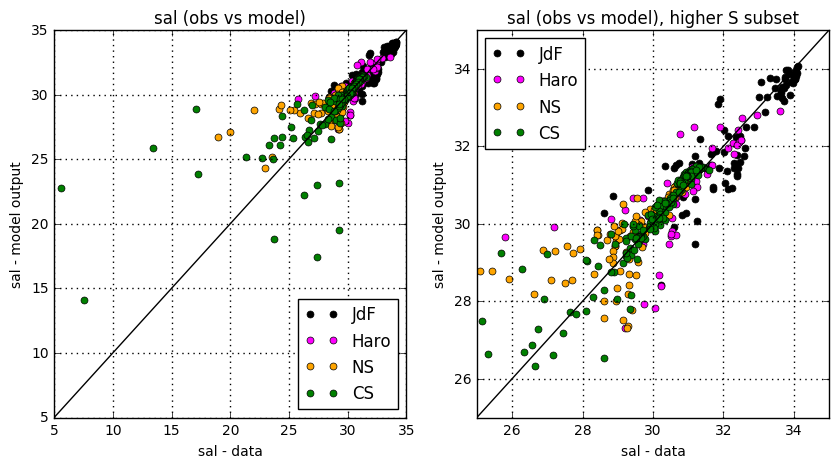

In [26]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        ax.plot(sal_jdf,sal_MODjdf,'ko',markersize=5)
        ax.plot(sal_haro,sal_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,sal_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,sal_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(sal_compbl,sal_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('sal - data')
        ax.set_ylabel('sal - model output')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(5,35)
        ax.set_ylim(5,35)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('sal (obs vs model)')
        ax.plot([3,35],[3,35],'k')    

    if i == 2:
        ax.plot(sal_jdf,sal_MODjdf,'ko',markersize=5)
        ax.plot(sal_haro,sal_MODharo,c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,sal_MODns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,sal_MODcs,c='green', marker='o',linestyle='None',markersize=5)
        #ax.plot(sal_compbl,sal_mod_compbl,'r*',markersize=5)

        ax.set_xlabel('sal - data')
        ax.set_ylabel('sal - model output')
        ax.legend(['JdF','Haro','NS','CS'],loc='best')
        ax.set_xlim(25,35)
        ax.set_ylim(25,35)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('sal (obs vs model), higher S subset')
        ax.plot([3,35],[3,35],'k')
    

## dic vs sal

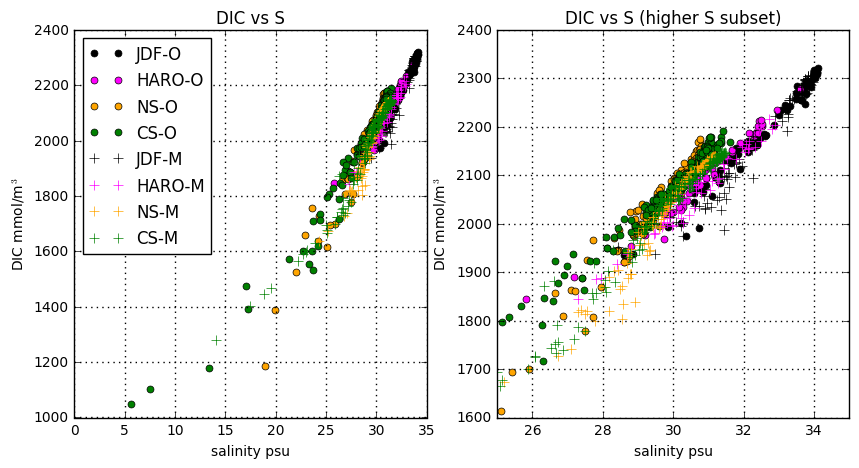

In [27]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,dic_jdf,'ko',markersize=5)
        ax.plot(sal_haro,dic_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,dic_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,dic_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,dic_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,dic_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,dic_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,dic_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        ax.set_ylim([1000,2400])
        ax.set_title('DIC vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('DIC mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,dic_jdf,'ko',markersize=5)
        ax.plot(sal_haro,dic_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,dic_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,dic_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,dic_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,dic_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,dic_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,dic_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.set_xlim([25,35])
        ax.set_ylim([1600,2400])
        ax.set_title('DIC vs S (higher S subset)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('DIC mmol/m$^3$')
    

## TA vs sal

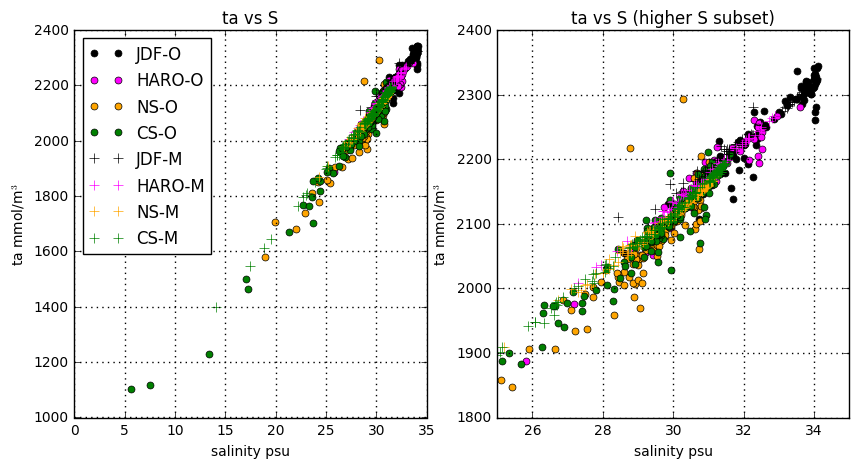

In [28]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,ta_jdf,'ko',markersize=5)
        ax.plot(sal_haro,ta_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,ta_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,ta_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,ta_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,ta_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,ta_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,ta_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        ax.set_ylim([1000,2400])
        ax.set_title('ta vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('ta mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,ta_jdf,'ko',markersize=5)
        ax.plot(sal_haro,ta_haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,ta_ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,ta_cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,ta_MODjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,ta_MODharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,ta_MODns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,ta_MODcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.set_xlim([25,35])
        ax.set_ylim([1800,2400])
        ax.set_title('ta vs S (higher S subset)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('ta mmol/m$^3$')
    

## Nitrate comparisons

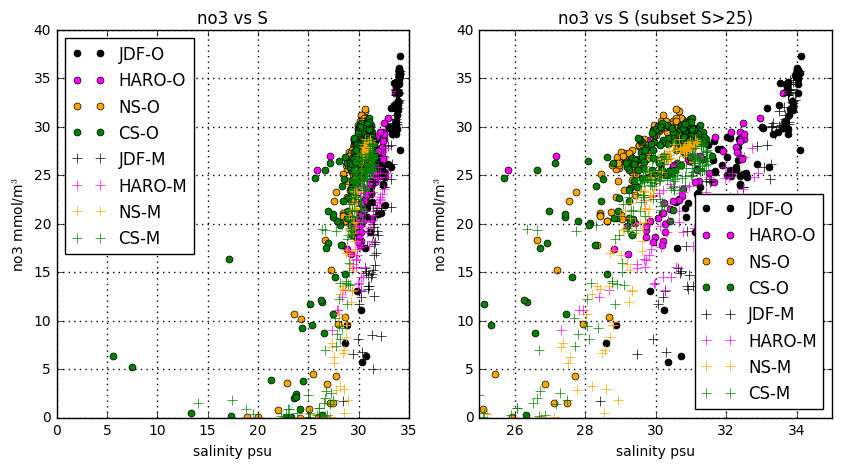

In [29]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(sal_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(sal_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([0,35])
        #ax.set_ylim([1000,2400])
        ax.set_title('no3 vs S')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('no3 mmol/m$^3$')

    if i==2:
        ax.plot(sal_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(sal_haro,NO3haro,'ko',c='fuchsia', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_ns,NO3ns,c='orange', marker='o',linestyle='None',markersize=5)
        ax.plot(sal_cs,NO3cs,c='green', marker='o',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(sal_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(sal_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(sal_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([25,35])
        #ax.set_ylim([1000,2400])
        ax.set_title('no3 vs S (subset S>25)')
        ax.set_xlabel('salinity psu')
        ax.set_ylabel('no3 mmol/m$^3$')
    

In [30]:
redrat = 106/16


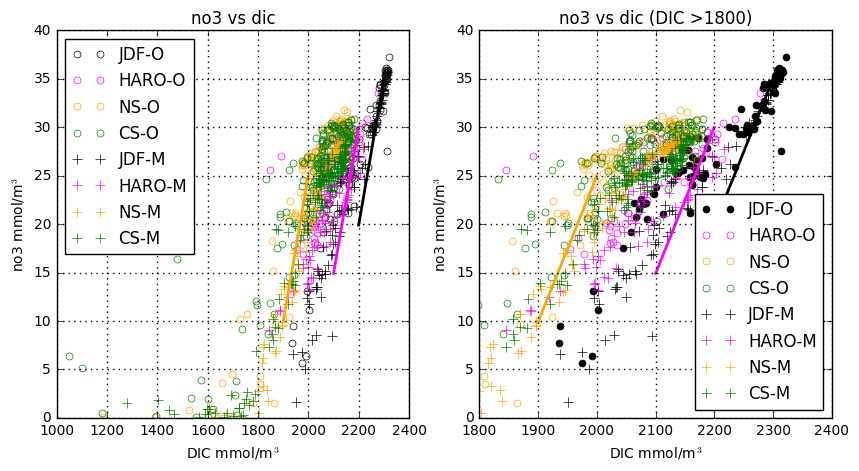

In [31]:
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    if i==1:
        ax.plot(dic_jdf,NO3jdf,'ko',fillstyle='none',markersize=5)
        ax.plot(dic_haro,NO3haro,'ko',c='fuchsia', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.plot(dic_ns,NO3ns,c='orange', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.plot(dic_cs,NO3cs,c='green', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(dic_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(dic_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        ax.set_xlim([1000,2400])
        ax.set_ylim([0,40])
        #ax.plot([35-(100/redrat),2200],c='red', marker='o',linestyle='None',markersize=10)
        ax.plot([2200,2300],[35-(100/redrat),35],c='black',linestyle='-',linewidth=2)
        ax.plot([2100,2200],[30-(100/redrat),30],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([1900,2000],[25-(100/redrat),25],c='orange',linestyle='-',linewidth=2)
        
        ax.set_title('no3 vs dic')
        ax.set_xlabel('DIC mmol/m$^3$')
        ax.set_ylabel('no3 mmol/m$^3$')

    if i==2:
        ax.plot(dic_jdf,NO3jdf,'ko',markersize=5)
        ax.plot(dic_haro,NO3haro,'ko',c='fuchsia', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.plot(dic_ns,NO3ns,c='orange', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.plot(dic_cs,NO3cs,c='green', marker='o',fillstyle='none',linestyle='None',markersize=5)
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        ax.plot(dic_MODjdf,NO3_modjdf,'k+',markersize=7)
        ax.plot(dic_MODharo,NO3_modharo,'ko',c='fuchsia', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODns,NO3_modns,c='orange', marker='+',linestyle='None',markersize=7)
        ax.plot(dic_MODcs,NO3_modcs,c='green', marker='+',linestyle='None',markersize=7)
        ax.plot([2200,2300],[35-(100/redrat),35],c='black',linestyle='-',linewidth=2)
        ax.plot([2100,2200],[30-(100/redrat),30],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([1900,2000],[25-(100/redrat),25],c='orange',linestyle='-',linewidth=2)
        
        ax.legend(['JDF-O','HARO-O','NS-O','CS-O','JDF-M','HARO-M','NS-M','CS-M'],loc='best')
        #ax.set_xlim([25,35])
        ax.set_xlim([1800,2400])
        ax.set_title('no3 vs dic (DIC >1800)')
        ax.set_xlabel('DIC mmol/m$^3$')
        ax.set_ylabel('no3 mmol/m$^3$')
    